# Librerie

In [498]:
pip install -U imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [499]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



# Caricamento e visualizzazione dataset

In [500]:
adress = pd.read_csv('data_marketing_analytics_2023/tbl_addresses.csv', sep =',')
customer_account = pd.read_csv('data_marketing_analytics_2023/tbl_customer_accounts.csv')
customer_reviews = pd.read_csv('data_marketing_analytics_2023/tbl_customer_reviews.csv')
customer = pd.read_csv('data_marketing_analytics_2023/tbl_customers.csv')
labelled_reviews = pd.read_csv('data_marketing_analytics_2023/tbl_labelled_reviews.csv')
orders = pd.read_csv('data_marketing_analytics_2023/tbl_orders.csv')
products = pd.read_csv('data_marketing_analytics_2023/tbl_products.csv')

In [501]:
# Calcola il numero di valori uguali a -1 nella colonna
numero_valori_uguali_a_zero = orders["direction"][orders["direction"] == -1].count()

# Calcola il numero totale di valori nella colonna
numero_totale_valori = len(orders["direction"])

# Calcola la percentuale
percentuale_valori_uguali_a_zero = (numero_valori_uguali_a_zero / numero_totale_valori) * 100

print(f"Numero di valori uguali a -1: {numero_valori_uguali_a_zero}")
print(f"Percentuale di valori uguali a -1: {percentuale_valori_uguali_a_zero:.2f}%")

#questa è la percentuale e il numero di utenti che hanno restituito un prodotto, poichè se è uguale a -1 vuol dire che il prodotto è stato restituito, non esiste un valore 0 come se l'utente non avesse fatto un ordine

Numero di valori uguali a -1: 62557
Percentuale di valori uguali a -1: 6.02%


In [502]:
#drop refunded items
orders = orders[orders['direction'] == 1] #consider only purchases, no refunds transaction
orders

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime
0,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.0,2022-10-04T182851
1,8fe4346b53d0c781b275a614175804de,23,49,30344384,1,8.30,0.0,2022-10-04T182851
2,8fe4346b53d0c781b275a614175804de,23,49,33794292,1,1.99,0.0,2022-10-04T182851
3,8fe4346b53d0c781b275a614175804de,23,49,33795776,1,5.10,0.0,2022-10-04T182851
4,8fe4346b53d0c781b275a614175804de,23,49,36235381,1,76.05,0.0,2022-10-04T182851
...,...,...,...,...,...,...,...,...
1039860,697c0078b69d9f8c119d8dd9a7952019,934581,29,35508942,1,33.60,0.0,2023-04-30T193553
1039861,86c9c4fdb8829e2ab90a86a357763419,934620,44,36237691,1,11.99,0.0,2023-04-30T191955
1039862,86c9c4fdb8829e2ab90a86a357763419,934620,44,81259479,1,9.99,0.0,2023-04-30T191955
1039863,86f8ca9e4008249e5e0acc5ff23e2284,934660,46,34067775,1,1.90,0.0,2023-04-30T193217


In [503]:
customer.head()

,customer_id,address_id,birthdate,gender,job_type,email_provider,flag_phone_provided,flag_privacy
0,891057,863914,2001-10-22,F,NaN,yahoo.it,1.0,True
1,655484,639856,2001-04-30,M,NaN,yahoo.it,1.0,False
2,514958,494806,2001-01-01,M,NaN,libero.it,1.0,True
3,398355,377261,2000-03-09,M,NaN,gmail.com,1.0,True
4,23808,20227,1999-11-21,F,NaN,virgilio.it,1.0,True


In [504]:
customer_account.head()

,customer_id,account_id,favorite_store,loyalty_type,loyatlty_status,activation_date
0,9557,746573,9,premium,1,2023-01-11
1,743090,776971,2,premium,1,2023-01-30
2,813156,791681,45,premium,1,2023-02-08
3,843392,825439,1,premium,1,2023-03-01
4,20476,815010,16,premium,1,2023-02-23


In [505]:
orders.head()

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime
0,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.0,2022-10-04T182851
1,8fe4346b53d0c781b275a614175804de,23,49,30344384,1,8.30,0.0,2022-10-04T182851
2,8fe4346b53d0c781b275a614175804de,23,49,33794292,1,1.99,0.0,2022-10-04T182851
3,8fe4346b53d0c781b275a614175804de,23,49,33795776,1,5.10,0.0,2022-10-04T182851
4,8fe4346b53d0c781b275a614175804de,23,49,36235381,1,76.05,0.0,2022-10-04T182851


In [506]:
adress.head()

,address_id,postal_code,district,region
0,1337,20083.0,MI,LOMBARDIA
1,1347,20090.0,MI,LOMBARDIA
2,1347,20090.0,MI,LOMBARDIA
3,1347,20090.0,MI,LOMBARDIA
4,1347,20090.0,MI,LOMBARDIA


In [507]:
products.head()

,product_id,product_class
0,35996051,9
1,35980371,14
2,31276196,4
3,31276224,4
4,31456495,4


# Preprocessing e Data cleaning

In [508]:
print(customer.shape)

(140946, 8)


In [509]:
print(customer.columns)

Index(['customer_id', 'address_id', 'birthdate', 'gender', 'job_type',
       'email_provider', 'flag_phone_provided', 'flag_privacy'],
      dtype='object')


In [510]:
print(customer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140946 entries, 0 to 140945
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   customer_id          140946 non-null  int64  
 1   address_id           140946 non-null  int64  
 2   birthdate            140946 non-null  object 
 3   gender               140946 non-null  object 
 4   job_type             4295 non-null    object 
 5   email_provider       139111 non-null  object 
 6   flag_phone_provided  129675 non-null  float64
 7   flag_privacy         140946 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 7.7+ MB
None


In [511]:
print(customer.isnull().sum())

customer_id                 0
address_id                  0
birthdate                   0
gender                      0
job_type               136651
email_provider           1835
flag_phone_provided     11271
flag_privacy                0
dtype: int64


In [512]:
#controllo duplicati
customer['customer_id'].duplicated().sum()

0

(array([72320.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 68626.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

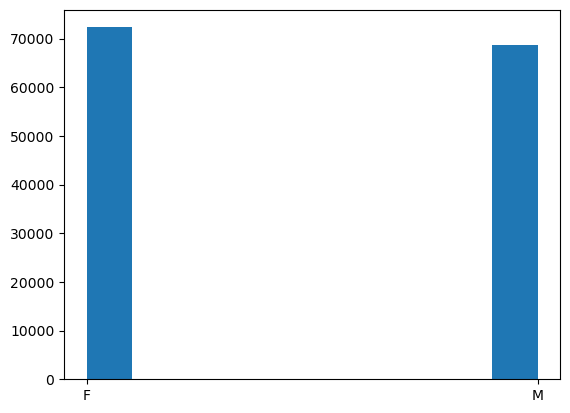

In [513]:
plt.hist(customer['gender'])

## Info customer, creazione colonna età e range

In [514]:
print(orders.isnull().sum())

order_id             0
customer_id          0
store_id             0
product_id           0
direction            0
gross_price          0
price_reduction      0
purchase_datetime    0
dtype: int64


In [515]:
orders['customer_id'].duplicated().sum()

873174

In [516]:
from datetime import datetime


età_customer = {'birthdate': customer['birthdate']}
df_età = pd.DataFrame(età_customer)

def calcola_età(data_nascita):
    oggi = datetime.now().date()
    data_nascita = datetime.strptime(data_nascita, "%Y-%m-%d").date()
    differenza = oggi - data_nascita
    eta = differenza.days // 365
    return eta

df_età = customer[['customer_id', 'birthdate']].copy()

df_età['Età'] = df_età['birthdate'].apply(calcola_età)

print(df_età)

range_eta = [0, 18, 30, 42, 54, 66, 78, np.inf]
etichette_range = ['0-18', '19-30', '31-42', '43-54', '55-66', '67-78', '79+']

df_età['Range Età'] = pd.cut(df_età['Età'], bins=range_eta, labels=etichette_range, right=False)

print(df_età)

        customer_id   birthdate  Età
0            891057  2001-10-22   21
1            655484  2001-04-30   22
2            514958  2001-01-01   22
3            398355  2000-03-09   23
4             23808  1999-11-21   23
...             ...         ...  ...
140941       449222  1945-05-30   78
140942       368113  1943-11-18   79
140943       424451  1943-05-07   80
140944       808137  1943-02-13   80
140945       442860  1940-05-18   83

[140946 rows x 3 columns]
        customer_id   birthdate  Età Range Età
0            891057  2001-10-22   21     19-30
1            655484  2001-04-30   22     19-30
2            514958  2001-01-01   22     19-30
3            398355  2000-03-09   23     19-30
4             23808  1999-11-21   23     19-30
...             ...         ...  ...       ...
140941       449222  1945-05-30   78       79+
140942       368113  1943-11-18   79       79+
140943       424451  1943-05-07   80       79+
140944       808137  1943-02-13   80       79+
140945      

(array([ 1370.,     0., 48632.,     0., 70121.,     0., 14748.,     0.,
         5580.,   495.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

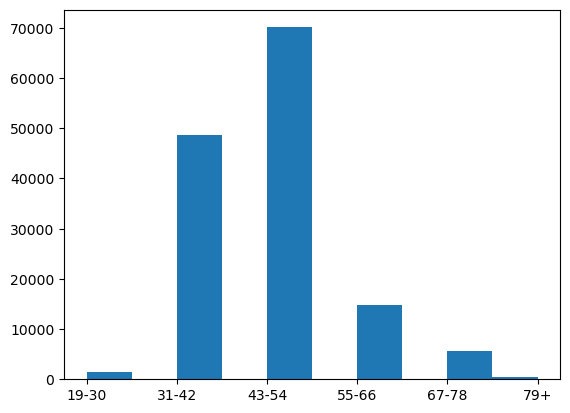

In [517]:
plt.hist(df_età['Range Età'])

## customer account - preprocessing

In [518]:
customer_account.head()

,customer_id,account_id,favorite_store,loyalty_type,loyatlty_status,activation_date
0,9557,746573,9,premium,1,2023-01-11
1,743090,776971,2,premium,1,2023-01-30
2,813156,791681,45,premium,1,2023-02-08
3,843392,825439,1,premium,1,2023-03-01
4,20476,815010,16,premium,1,2023-02-23


In [519]:
print(customer_account.shape)

(169494, 6)


In [520]:
print(customer_account.columns)

Index(['customer_id', 'account_id', 'favorite_store', 'loyalty_type',
       'loyatlty_status', 'activation_date'],
      dtype='object')


In [521]:
print(customer_account.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169494 entries, 0 to 169493
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   customer_id      169494 non-null  int64 
 1   account_id       169494 non-null  int64 
 2   favorite_store   169494 non-null  int64 
 3   loyalty_type     169494 non-null  object
 4   loyatlty_status  169494 non-null  int64 
 5   activation_date  169494 non-null  object
dtypes: int64(4), object(2)
memory usage: 7.8+ MB
None


In [522]:
print(customer_account.isnull().sum())

customer_id        0
account_id         0
favorite_store     0
loyalty_type       0
loyatlty_status    0
activation_date    0
dtype: int64


In [523]:
customer_account['customer_id'].duplicated().sum()
#Presenza di 310 duplicati

310

In [524]:
#elimino i duplicati
customer_account.drop_duplicates(subset='customer_id')

,customer_id,account_id,favorite_store,loyalty_type,loyatlty_status,activation_date
0,9557,746573,9,premium,1,2023-01-11
1,743090,776971,2,premium,1,2023-01-30
2,813156,791681,45,premium,1,2023-02-08
3,843392,825439,1,premium,1,2023-03-01
4,20476,815010,16,premium,1,2023-02-23
...,...,...,...,...,...,...
169489,828458,895971,47,standard,1,2023-04-09
169490,575891,525794,1,standard,1,2022-09-14
169491,316991,231471,14,standard,1,2022-04-15
169492,403638,329448,1,standard,1,2022-05-31


(array([ 28039.,      0.,      0.,   4216.,      0.,      0., 124116.,
             0.,      0.,  13123.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

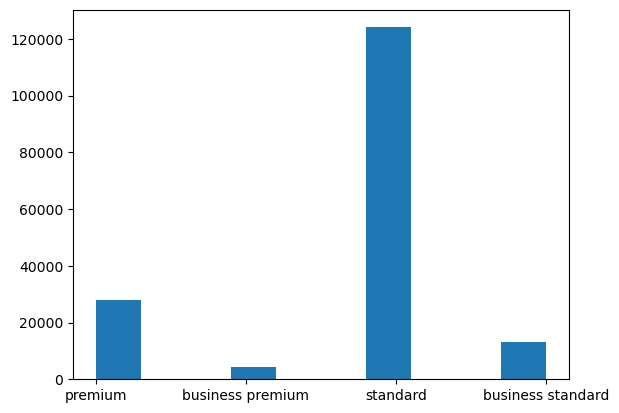

In [525]:
plt.hist(customer_account['loyalty_type'])

In [526]:
customer_reviews['customer_id'].duplicated().sum()

0

In [527]:
print(customer.shape)
print(customer_account.shape)
print(customer_reviews.shape)
print(orders.shape)
print(customer.columns)
print(customer_account.columns)
print(customer_reviews.columns)
print(orders.columns)

(140946, 8)
(169494, 6)
(105710, 3)
(977308, 8)
Index(['customer_id', 'address_id', 'birthdate', 'gender', 'job_type',
       'email_provider', 'flag_phone_provided', 'flag_privacy'],
      dtype='object')
Index(['customer_id', 'account_id', 'favorite_store', 'loyalty_type',
       'loyatlty_status', 'activation_date'],
      dtype='object')
Index(['review_id', 'customer_id', 'review_text'], dtype='object')
Index(['order_id', 'customer_id', 'store_id', 'product_id', 'direction',
       'gross_price', 'price_reduction', 'purchase_datetime'],
      dtype='object')


(array([  1330.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 168164.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

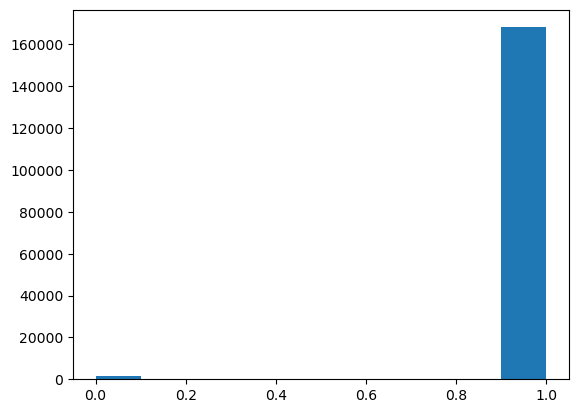

In [528]:
plt.hist(customer_account['loyatlty_status'])
#solo 1330 valori con 0

# Customer Focus: RFM;

In [529]:
orders.head()

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime
0,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.0,2022-10-04T182851
1,8fe4346b53d0c781b275a614175804de,23,49,30344384,1,8.30,0.0,2022-10-04T182851
2,8fe4346b53d0c781b275a614175804de,23,49,33794292,1,1.99,0.0,2022-10-04T182851
3,8fe4346b53d0c781b275a614175804de,23,49,33795776,1,5.10,0.0,2022-10-04T182851
4,8fe4346b53d0c781b275a614175804de,23,49,36235381,1,76.05,0.0,2022-10-04T182851


In [530]:
#modifico la data purchase_datetime in modo "%d-%m-%Y %H:%M:%S"

# Conversione della colonna in formato datetime
orders['purchase_datetime'] = pd.to_datetime(orders['purchase_datetime'], format="%Y-%m-%dT%H%M%S")

# Formattazione della colonna nel formato desiderato
orders['Formatted_datetime'] = orders['purchase_datetime'].dt.strftime("%d-%m-%Y %H:%M:%S")

# Stampa del dataframe risultante
print(orders)

                                 order_id  customer_id  store_id  product_id  \
0        8fe4346b53d0c781b275a614175804de           23        49    35551922   
1        8fe4346b53d0c781b275a614175804de           23        49    30344384   
2        8fe4346b53d0c781b275a614175804de           23        49    33794292   
3        8fe4346b53d0c781b275a614175804de           23        49    33795776   
4        8fe4346b53d0c781b275a614175804de           23        49    36235381   
...                                   ...          ...       ...         ...   
1039860  697c0078b69d9f8c119d8dd9a7952019       934581        29    35508942   
1039861  86c9c4fdb8829e2ab90a86a357763419       934620        44    36237691   
1039862  86c9c4fdb8829e2ab90a86a357763419       934620        44    81259479   
1039863  86f8ca9e4008249e5e0acc5ff23e2284       934660        46    34067775   
1039864  d4c3ac4258e22ccdefc09a4e34e77d2c       934716        44    36161790   

         direction  gross_price  price_

## recency

In [531]:
#calcoliamo la Recency

df_recency = orders.groupby(by='customer_id', 
                            as_index=False)['purchase_datetime'].max()
df_recency.columns = ['customer_id', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x:(recent_date - x).days)
df_recency.head()

,customer_id,LastPurchaseDate,Recency
0,23,2023-02-20 11:51:51,69
1,30,2022-07-23 07:06:38,281
2,32,2023-04-02 15:11:58,28
3,48,2023-04-30 19:35:36,0
4,50,2023-02-19 16:56:32,70


In [532]:
# Calcola il numero di valori uguali a 0 nella colonna
numero_valori_uguali_a_zero = df_recency["Recency"][df_recency["Recency"] == 0].count()

# Calcola il numero totale di valori nella colonna
numero_totale_valori = len(df_recency["Recency"])

# Calcola la percentuale
percentuale_valori_uguali_a_zero = (numero_valori_uguali_a_zero / numero_totale_valori) * 100

print(f"Numero di valori uguali a 0: {numero_valori_uguali_a_zero}")
print(f"Percentuale di valori uguali a 0: {percentuale_valori_uguali_a_zero:.2f}%")


Numero di valori uguali a 0: 1046
Percentuale di valori uguali a 0: 1.00%


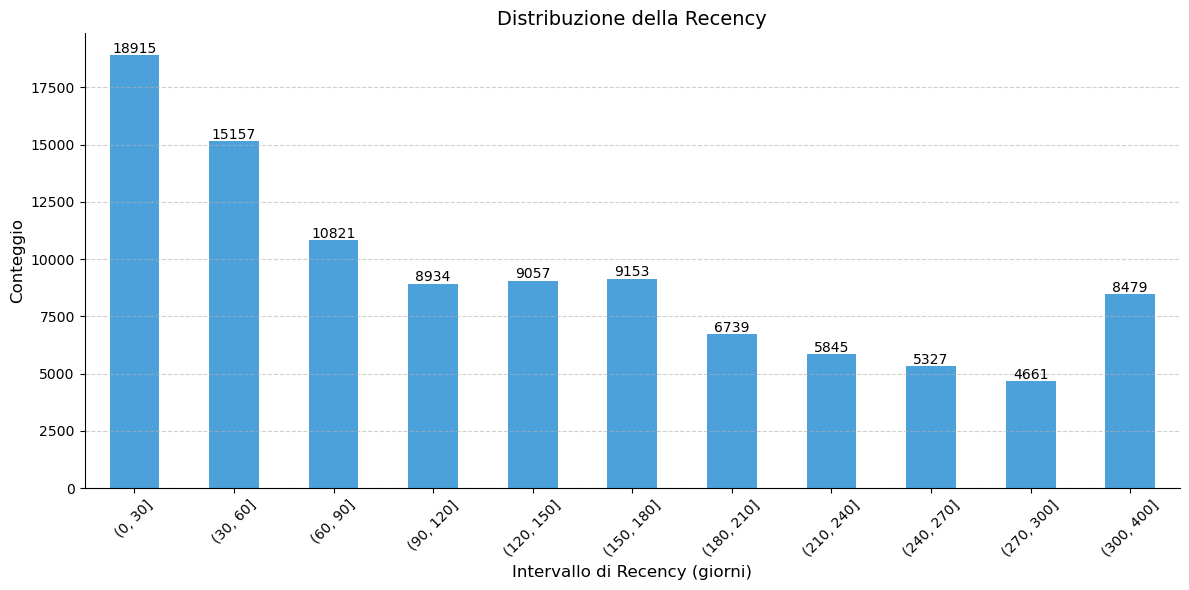

In [533]:
# Creare un DataFrame di esempio (sostituisci questo con il tuo DataFrame)
data = df_recency

# Raggruppare i dati in intervalli di recency
intervalli = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 400]  # Specifica gli intervalli desiderati in giorni
df_recency['intervallo_recency'] = pd.cut(df_recency['Recency'], intervalli)

# Calcolare la distribuzione
distribuzione = df_recency['intervallo_recency'].value_counts().sort_index()

# Creare un grafico a istogramma
plt.figure(figsize=(12, 6))
ax = distribuzione.plot(kind='bar', color='#007acc', alpha=0.7)
ax.yaxis.grid(True, linestyle='--', alpha=0.6)

# Etichette e titolo del grafico
plt.xlabel('Intervallo di Recency (giorni)', fontsize=12)
plt.ylabel('Conteggio', fontsize=12)
plt.title('Distribuzione della Recency', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height() + 100),
                ha='center', fontsize=10, color='black')

# Mostrare il grafico
plt.tight_layout()
plt.show()


## frequency

In [534]:
#calcoliamo la Frequency

# Get order counts for each user and create a dataframe with it
ctm_frequency = orders.groupby('customer_id').purchase_datetime.count().reset_index()
ctm_frequency.columns = ['customer_id', 'Frequency']

ctm_frequency.head()


,customer_id,Frequency
0,23,37
1,30,12
2,32,11
3,48,52
4,50,4


In [535]:
ctm_frequency[ctm_frequency['Frequency']>100]

,customer_id,Frequency
43,337,1217
417,2844,105
746,5168,119
1061,7380,177
1400,9814,763
...,...,...
98067,834802,182
98130,835354,146
100444,862533,135
100957,868744,123


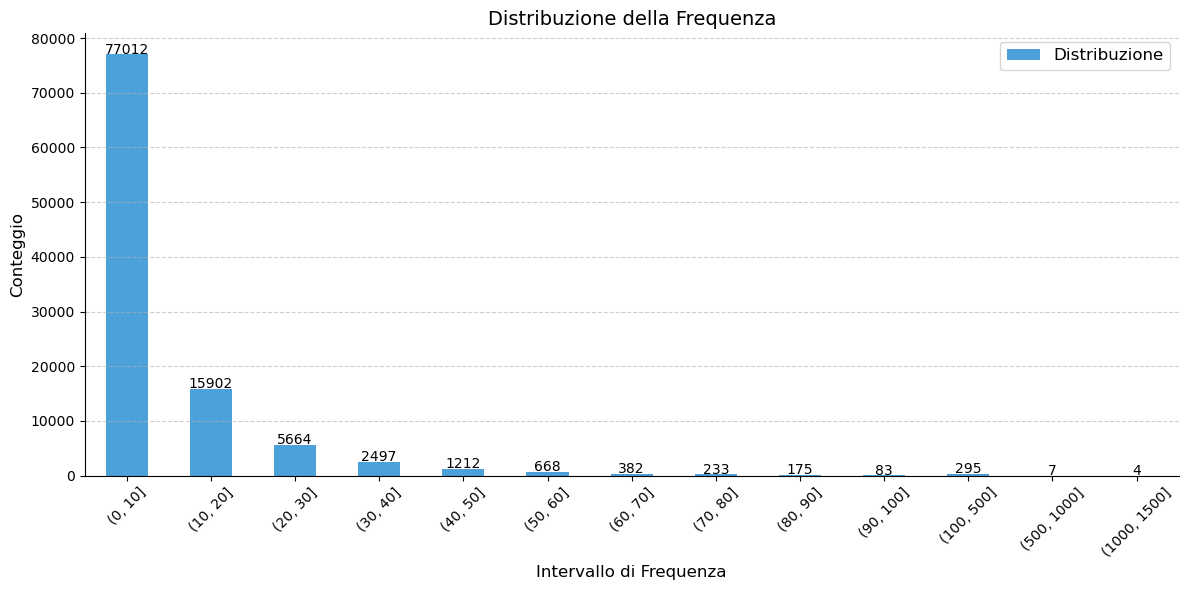

In [536]:
# Creare un DataFrame di esempio (sostituisci questo con il tuo DataFrame)
data = ctm_frequency

# Raggruppare i dati in intervalli di frequenza
intervalli = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 500, 1000, 1500]  # Specifica gli intervalli desiderati
ctm_frequency['intervallo_frequenza'] = pd.cut(ctm_frequency['Frequency'], intervalli)

# Calcolare la distribuzione
distribuzione = ctm_frequency['intervallo_frequenza'].value_counts().sort_index()

# Creare un grafico a istogramma
plt.figure(figsize=(12, 6))
ax = distribuzione.plot(kind='bar', color='#007acc', alpha=0.7)
ax.yaxis.grid(True, linestyle='--', alpha=0.6)

# Etichette e titolo del grafico
plt.xlabel('Intervallo di Frequenza', fontsize=12)
plt.ylabel('Conteggio', fontsize=12)
plt.title('Distribuzione della Frequenza', fontsize=14)
ax.legend(['Distribuzione'], fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height() + 100),
                ha='center', fontsize=10, color='black')
# Mostrare il grafico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## monetary value

In [537]:
#Calcoliamo Monetary Value

orders['Total'] = orders['gross_price']*orders['direction']
monetary_df = orders.groupby(by='customer_id', as_index=False)['Total'].sum()
monetary_df.columns = ['customer_id', 'Monetary']
monetary_df.head()

,customer_id,Monetary
0,23,490.60
1,30,10179.56
2,32,58.85
3,48,1585.28
4,50,28.75


In [538]:
monetary_df[monetary_df['Monetary'] > 5000]

,customer_id,Monetary
1,30,10179.56
332,2263,12816.07
390,2684,5015.07
916,6307,21297.99
1353,9421,7130.64
...,...,...
98420,838700,5933.51
98963,845152,5973.25
99875,855685,5336.00
100031,857278,8790.40


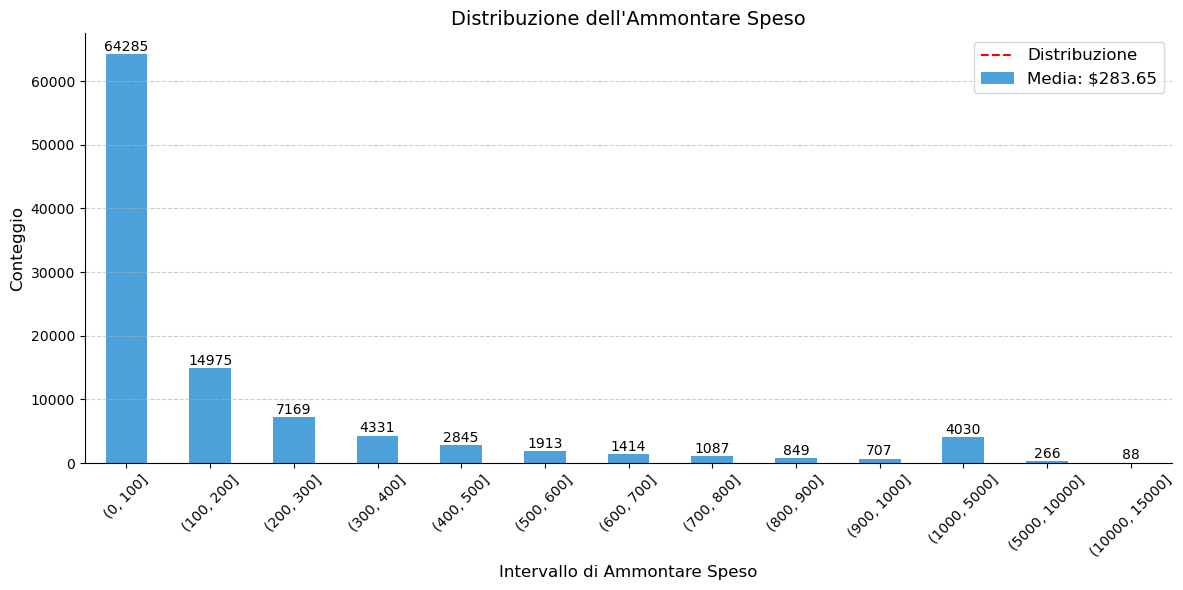

In [539]:
# Creare un DataFrame di esempio (sostituisci questo con il tuo DataFrame)
data = monetary_df

# Raggruppare i dati in intervalli di ammontare speso
intervalli = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 5000, 10000, 15000]  # Specifica gli intervalli desiderati
monetary_df['intervallo_monetary'] = pd.cut(monetary_df['Monetary'], intervalli)

# Calcolare la distribuzione
distribuzione = monetary_df['intervallo_monetary'].value_counts().sort_index()

# Creare un grafico a istogramma
plt.figure(figsize=(12, 6))
ax = distribuzione.plot(kind='bar', color='#007acc', alpha=0.7)
ax.yaxis.grid(True, linestyle='--', alpha=0.6)

# Etichette e titolo del grafico
plt.xlabel('Intervallo di Ammontare Speso', fontsize=12)
plt.ylabel('Conteggio', fontsize=12)
plt.title('Distribuzione dell\'Ammontare Speso', fontsize=14)
ax.legend(['Distribuzione'], fontsize=12)

# Mostrare il grafico
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height() + 500),
                ha='center', fontsize=10, color='black')

# Aggiungere una linea verticale per evidenziare la media
media_monetary = monetary_df['Monetary'].mean()
plt.axvline(x=intervalli.index(intervalli[-1]), color='red', linestyle='--', label=f'Media: ${media_monetary:.2f}')

# Aggiungere una legenda per la media
ax.legend(['Distribuzione', f'Media: ${media_monetary:.2f}'], fontsize=12)

# Mostrare il grafico
plt.tight_layout()
plt.show()

## RFM score + Grafico

In [540]:
#mergio le tre colonne in un dataframe
rf_df = df_recency.merge(ctm_frequency, on='customer_id')
rfm_df = rf_df.merge(monetary_df, on='customer_id').drop(
    columns='LastPurchaseDate')
rfm_df.head()

,customer_id,Recency,intervallo_recency,Frequency,intervallo_frequenza,Monetary,intervallo_monetary
0,23,69,"(60.0, 90.0]",37,"(30, 40]",490.60,"(400, 500]"
1,30,281,"(270.0, 300.0]",12,"(10, 20]",10179.56,"(10000, 15000]"
2,32,28,"(0.0, 30.0]",11,"(10, 20]",58.85,"(0, 100]"
3,48,0,NaN,52,"(50, 60]",1585.28,"(1000, 5000]"
4,50,70,"(60.0, 90.0]",4,"(0, 10]",28.75,"(0, 100]"


In [541]:
#mergio le tre colonne in un dataframe
rf_df = df_recency.merge(ctm_frequency, on='customer_id')
rfm_df = rf_df.merge(monetary_df, on='customer_id')
rfm_df.head()
#ho tolto il drop perchè mi serve LAstPurchaseDate (31/08)

,customer_id,LastPurchaseDate,Recency,intervallo_recency,Frequency,intervallo_frequenza,Monetary,intervallo_monetary
0,23,2023-02-20 11:51:51,69,"(60.0, 90.0]",37,"(30, 40]",490.60,"(400, 500]"
1,30,2022-07-23 07:06:38,281,"(270.0, 300.0]",12,"(10, 20]",10179.56,"(10000, 15000]"
2,32,2023-04-02 15:11:58,28,"(0.0, 30.0]",11,"(10, 20]",58.85,"(0, 100]"
3,48,2023-04-30 19:35:36,0,NaN,52,"(50, 60]",1585.28,"(1000, 5000]"
4,50,2023-02-19 16:56:32,70,"(60.0, 90.0]",4,"(0, 10]",28.75,"(0, 100]"


In [542]:
#Ranking Customer’s based upon their recency, frequency, and monetary score
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,customer_id,LastPurchaseDate,Recency,intervallo_recency,Frequency,intervallo_frequenza,Monetary,intervallo_monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,23,2023-02-20 11:51:51,69,"(60.0, 90.0]",37,"(30, 40]",490.60,"(400, 500]",63.466411,96.429600,96.429600
1,30,2022-07-23 07:06:38,281,"(270.0, 300.0]",12,"(10, 20]",10179.56,"(10000, 15000]",11.205320,77.489581,77.489581
2,32,2023-04-02 15:11:58,28,"(0.0, 30.0]",11,"(10, 20]",58.85,"(0, 100]",82.825748,75.181497,75.181497
3,48,2023-04-30 19:35:36,0,NaN,52,"(50, 60]",1585.28,"(1000, 5000]",100.000000,98.362687,98.362687
4,50,2023-02-19 16:56:32,70,"(60.0, 90.0]",4,"(0, 10]",28.75,"(0, 100]",63.180728,42.710834,42.710834


In [543]:
#Calculating RFM score
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_Score']].head(7)

,customer_id,RFM_Score
0,23,4.57
1,30,3.38
2,32,3.82
3,48,4.93
4,50,2.29
5,60,0.66
6,76,1.95


Rating Customer based upon the RFM score
rfm score >4.5 : Top Customer
4.5 > rfm score > 4 : High Value Customer
4>rfm score >3 : Medium value customer
3>rfm score>1.6 : Low-value customer
rfm score<1.6 :Lost Customer

In [544]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['customer_id', 'RFM_Score', 'Customer_segment']].head(20)

,customer_id,RFM_Score,Customer_segment
0,23,4.57,Top Customers
1,30,3.38,Medium Value Customer
2,32,3.82,Medium Value Customer
3,48,4.93,Top Customers
4,50,2.29,Low Value Customers
5,60,0.66,Lost Customers
6,76,1.95,Low Value Customers
7,86,2.13,Low Value Customers
8,95,1.62,Low Value Customers
9,108,0.52,Lost Customers


Visualizing the customer segments


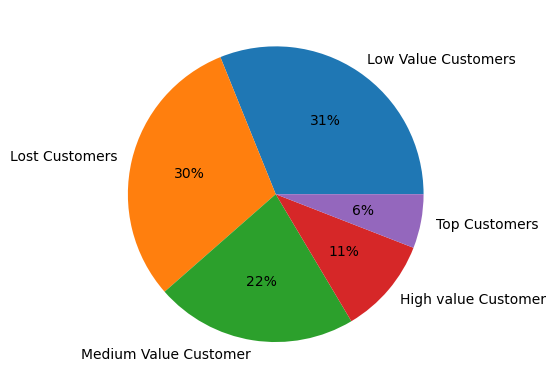

In [545]:
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

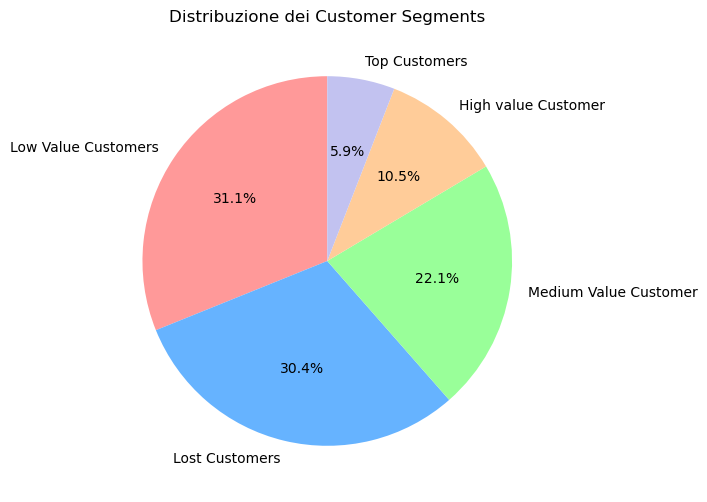

In [546]:
# Dati di esempio
segment_counts = rfm_df['Customer_segment'].value_counts()
segments = segment_counts.index
count_values = segment_counts.values

# Colori personalizzati
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#ffb366']

# Percentuali formattate
percentages = [f'{val / sum(count_values) * 100:.1f}%' for val in count_values]

# Crea il grafico a torta
plt.figure(figsize=(8, 6))
plt.pie(count_values, labels=segments, autopct='%1.1f%%', startangle=90, colors=colors)

# Aggiungi una legenda
#plt.legend(segments, title='Customer Segments', bbox_to_anchor=(1, 1), loc='upper left')

# Aggiungi una descrizione
plt.title('Distribuzione dei Customer Segments')

# Mostra il grafico
plt.show()


In [547]:
rfm_df.drop(columns=['M_rank_norm', 'F_rank_norm', 'R_rank_norm'], inplace=True)
rfm_df

,customer_id,LastPurchaseDate,Recency,intervallo_recency,Frequency,intervallo_frequenza,Monetary,intervallo_monetary,RFM_Score,Customer_segment
0,23,2023-02-20 11:51:51,69,"(60.0, 90.0]",37,"(30, 40]",490.60,"(400, 500]",4.57,Top Customers
1,30,2022-07-23 07:06:38,281,"(270.0, 300.0]",12,"(10, 20]",10179.56,"(10000, 15000]",3.38,Medium Value Customer
2,32,2023-04-02 15:11:58,28,"(0.0, 30.0]",11,"(10, 20]",58.85,"(0, 100]",3.82,Medium Value Customer
3,48,2023-04-30 19:35:36,0,NaN,52,"(50, 60]",1585.28,"(1000, 5000]",4.93,Top Customers
4,50,2023-02-19 16:56:32,70,"(60.0, 90.0]",4,"(0, 10]",28.75,"(0, 100]",2.29,Low Value Customers
...,...,...,...,...,...,...,...,...,...,...
104129,934484,2023-04-30 19:02:11,0,NaN,5,"(0, 10]",39.10,"(0, 100]",2.88,Low Value Customers
104130,934581,2023-04-30 19:35:53,0,NaN,1,"(0, 10]",33.60,"(0, 100]",1.09,Lost Customers
104131,934620,2023-04-30 19:19:55,0,NaN,2,"(0, 10]",21.98,"(0, 100]",1.70,Low Value Customers
104132,934660,2023-04-30 19:32:17,0,NaN,1,"(0, 10]",1.90,"(0, 100]",1.09,Lost Customers


# Clienti inattivi, clienti repeater e clienti one-shooter

In [548]:
min_timestamp = orders['purchase_datetime'].min()
print("Il valore temporale minimo è:", min_timestamp)
max_timestamp = orders['purchase_datetime'].max()
print("Il valore temporale massimo è:", max_timestamp)

#il primo ordine è stato fatto il primo maggio 2022, l'ultimo ordine il 30 aprile 2023, dunque posso calcolare gli inattivi su questo periodo.

Il valore temporale minimo è: 2022-05-01 07:19:05
Il valore temporale massimo è: 2023-04-30 21:11:13


In [549]:
# Filtra gli ordini in base alle date di interesse
orders_filtrati = orders[(orders["purchase_datetime"] >= min_timestamp) & (orders["purchase_datetime"] <= max_timestamp)]

# Estrai l'elenco degli ID dei clienti che hanno effettuato acquisti durante il periodo
clienti_con_acquisti = orders_filtrati["customer_id"].unique()

# Estrai l'elenco completo degli ID dei clienti
tutti_clienti = customer["customer_id"].unique()

# Calcola il numero di clienti che non hanno effettuato acquisti
numero_clienti_inattivi = len(set(tutti_clienti) - set(clienti_con_acquisti))

# Calcola il numero totale di clienti
numero_totale_clienti = len(tutti_clienti)

# Calcola la percentuale di clienti inattivi
percentuale_clienti_inattivi = (numero_clienti_inattivi / numero_totale_clienti) * 100

print(f"Numero di clienti inattivi: {numero_clienti_inattivi}")
print(f"Percentuale di clienti inattivi: {percentuale_clienti_inattivi:.2f}%")

#TROVATI :)
#Potremmo fare la mappa dell'Italia per come sono suddivisi

Numero di clienti inattivi: 36812
Percentuale di clienti inattivi: 26.12%


In [550]:
# Uniamo le due tabelle
combined_data = customer.merge(orders, on="customer_id")

# Filtriamo i dati per il periodo di tempo desiderato
combined_data = combined_data[combined_data["purchase_datetime"].between("2022-04-30", "2023-05-01")]

# Filtrare gli ordini che non sono stati resi
combined_data = combined_data[combined_data["direction"] == 1]

# Contare il numero di ordini per ogni utente
orders_count = combined_data.groupby("customer_id")["order_id"].nunique()

# Contare il numero di utenti che hanno effettuato più di un acquisto
multiple_purchase_users = orders_count[orders_count > 1].shape[0]

# Calcolare la percentuale di utenti che ha effettuato più di un acquisto
percentage = (multiple_purchase_users / combined_data["customer_id"].nunique()) * 100

print(f"La percentuale di utenti che ha effettuato più di un acquisto è: {percentage:.2f}%")


#Trovati pure questi, let's go, viene un attimo diverso rispetto al loro

La percentuale di utenti che ha effettuato più di un acquisto è: 67.55%


In [551]:
# creiamo un dataset con quelli che hanno fatto più acquisti

# Uniamo le due tabelle
combined_data = customer.merge(orders, on="customer_id")

# Filtriamo i dati per il periodo di tempo desiderato
combined_data = combined_data[combined_data["purchase_datetime"].between("2022-05-01", "2023-04-30")]

# Filtrare gli ordini che non sono stati resi
combined_data = combined_data[combined_data["direction"] == 1]

# Contare il numero di ordini per ogni utente
orders_count = combined_data.groupby("customer_id")["order_id"].nunique()

# Selezionare i customer_id con più di un acquisto
multiple_purchase_users = orders_count[orders_count > 1].index

# Filtrare i dati solo per i customer con più di un acquisto
multiple_purchase_data = combined_data[combined_data["customer_id"].isin(multiple_purchase_users)]

# Salvare i dati in un nuovo DataFrame
dataset_with_multiple_purchases = multiple_purchase_data.drop_duplicates(subset=["customer_id"])

# Stampa del nuovo dataset
dataset_with_multiple_purchases.head()

,customer_id,address_id,birthdate,gender,job_type,email_provider,flag_phone_provided,flag_privacy,order_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,Formatted_datetime,Total
29584,530927,511278,2002-02-10,M,NaN,gmail.com,1.0,False,ad56a8a2ce45dc19b8020f039fb59c80,28,36255954,1,2.95,0.0,2022-08-18 18:01:48,18-08-2022 18:01:48,2.95
29595,752409,736988,1999-09-04,M,NaN,hotmail.it,1.0,True,26f7ec1bddc8d774836187432fa2945d,6,33700716,1,0.20,0.0,2022-12-23 18:41:59,23-12-2022 18:41:59,0.20
29617,445398,424289,1998-11-28,M,NaN,gmail.com,1.0,True,c1fae0299027d51c5fc134fe9a72c9fb,17,33817091,1,0.50,0.0,2022-09-09 15:11:07,09-09-2022 15:11:07,0.50
29620,84948,72106,1998-09-27,F,NaN,libero.it,1.0,True,c6ab1421d5262a6d39ae0e59fc665b1f,6,34478094,1,16.20,0.0,2022-11-24 18:51:10,24-11-2022 18:51:10,16.20
29625,50426,42260,1998-08-23,M,NaN,gmail.com,1.0,True,1f7338e1f80b56fc3fcb1ca59e9aeb1a,20,35890113,1,7.50,0.0,2022-11-03 12:01:56,03-11-2022 12:01:56,7.50


In [552]:
# Conta il numero di acquisti per ogni customer_id
customer_purchase_counts = orders.groupby("customer_id")["order_id"].nunique()

# Filtra i clienti con un solo acquisto
customers_with_one_purchase = customer_purchase_counts[customer_purchase_counts == 1]

# Calcola il numero totale di clienti
total_customers = len(customer_purchase_counts)

# Calcola il numero di clienti con un solo acquisto
num_single_purchase_customers = len(customers_with_one_purchase)

# Calcola la percentuale rispetto al totale
percentage_single_purchase = (num_single_purchase_customers / total_customers) * 100

# Ottieni i dettagli completi dei clienti con un solo acquisto
single_purchase_details = orders[orders["customer_id"].isin(customers_with_one_purchase.index)]

# Stampa i dettagli dei clienti con un solo acquisto e la percentuale
#print("Dettagli clienti con un solo acquisto:")
#print(single_purchase_details)
print("\nPercentuale rispetto al totale: {:.2f}%".format(percentage_single_purchase))

#clienti con un solo acquisto



Percentuale rispetto al totale: 32.45%


In [553]:
# Conta il numero di acquisti per ogni customer_id
customer_purchase_counts = orders.groupby("customer_id")["order_id"].nunique()

# Filtra i clienti con un solo acquisto
customers_with_one_purchase = customer_purchase_counts[customer_purchase_counts == 1]

# Ottieni i dettagli completi dei clienti con un solo acquisto
single_purchase_details = orders[orders["customer_id"].isin(customers_with_one_purchase.index)]

# Crea un nuovo DataFrame con i clienti che hanno fatto un solo acquisto
single_purchase_dataset = single_purchase_details.drop_duplicates(subset=["customer_id"])

# Stampa il nuovo dataset con i clienti che hanno fatto un solo acquisto
single_purchase_dataset.head()

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,Formatted_datetime,Total
135,c14cd4c68ccabf1a47585bb4eced7ed4,60,49,35486626,1,49.98,0.0,2022-12-13 20:09:13,13-12-2022 20:09:13,49.98
139,0bedd5ef545c4d82f2575f0263997a6b,86,15,33700716,1,0.20,0.0,2022-05-04 12:32:34,04-05-2022 12:32:34,0.20
147,1b8ecf9fb13492ea6f2516621f2514e2,108,9,34400912,1,1.50,0.0,2022-10-05 19:03:31,05-10-2022 19:03:31,1.50
150,d77a9c05ed3d0e91f623873a92bbb33d,136,9,33700716,1,0.20,0.0,2023-01-28 12:35:53,28-01-2023 12:35:53,0.20
235,594d21cee158469aa63db1888c53ed0b,228,28,36578346,1,14.90,0.0,2023-03-18 12:07:25,18-03-2023 12:07:25,14.90


In [554]:
# Conta il numero di acquisti per ogni customer_id
customer_purchase_counts = orders.groupby("customer_id")["order_id"].nunique()

# Filtra i clienti con un solo acquisto
customers_with_one_purchase = customer_purchase_counts[customer_purchase_counts == 1]

# Ottieni i dettagli completi dei clienti con un solo acquisto dalla tabella "customer"
single_purchase_customer_details = customer[customer["customer_id"].isin(customers_with_one_purchase.index)]

# Stampa i dettagli dei clienti con un solo acquisto dalla tabella "customer"
print("Dettagli clienti con un solo acquisto:")
print(single_purchase_customer_details)

Dettagli clienti con un solo acquisto:
        customer_id  address_id   birthdate gender job_type email_provider  \
0            891057      863914  2001-10-22      F      NaN       yahoo.it   
2            514958      494806  2001-01-01      M      NaN      libero.it   
4             23808       20227  1999-11-21      F      NaN    virgilio.it   
7            568090      550583  1999-07-17      M      NaN      libero.it   
8            541673      522678  1999-05-07      M      NaN      gmail.com   
...             ...         ...         ...    ...      ...            ...   
116108       729792      714294  1982-02-18      F      NaN      gmail.com   
116641        88028       74867  1969-11-28      F      NaN      libero.it   
117313       442981      421870  1983-02-27      F      NaN      gmail.com   
119285       722582      707064  1982-09-17      M      NaN      gmail.com   
120445        26451       22399  1966-07-11      M      NaN      gmail.com   

        flag_phone_provi

# Repurchase time scale

In [555]:
orders.head()

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,Formatted_datetime,Total
0,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.0,2022-10-04 18:28:51,04-10-2022 18:28:51,125.40
1,8fe4346b53d0c781b275a614175804de,23,49,30344384,1,8.30,0.0,2022-10-04 18:28:51,04-10-2022 18:28:51,8.30
2,8fe4346b53d0c781b275a614175804de,23,49,33794292,1,1.99,0.0,2022-10-04 18:28:51,04-10-2022 18:28:51,1.99
3,8fe4346b53d0c781b275a614175804de,23,49,33795776,1,5.10,0.0,2022-10-04 18:28:51,04-10-2022 18:28:51,5.10
4,8fe4346b53d0c781b275a614175804de,23,49,36235381,1,76.05,0.0,2022-10-04 18:28:51,04-10-2022 18:28:51,76.05


In [556]:
# Calcola la differenza in giorni tra gli acquisti successivi
orders['differenza_giorni'] = orders.groupby('customer_id')['purchase_datetime'].diff().dt.days

# Calcola la differenza in ore tra gli acquisti successivi
#orders['differenza_ore'] = orders.groupby('customer_id')['purchase_datetime'].diff().dt.seconds / 3600

# La prima riga di ciascun cliente avrà NaN come differenza, possiamo sostituirla con 0
orders['differenza_giorni'].fillna(0, inplace=True)
#orders['differenza_ore'].fillna(0, inplace=True)

In [557]:
import pandas as pd

# Supponiamo che il tuo dataset si chiami 'df'
# Raggruppa per 'customer_id' e conta il numero di ordini per ciascun cliente
unique_order_counts = orders.groupby('customer_id')['order_id'].nunique()

# Filtra i clienti con più di un ordine
multi_order_customers = unique_order_counts[unique_order_counts > 1].index.tolist()

# Filtra il dataset originale includendo solo i clienti con più di un ordine
filtered_df = orders[orders['customer_id'].isin(multi_order_customers)]

# Ora 'filtered_df' contiene solo i clienti con più di un ordine
filtered_df.head(50)


,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,Formatted_datetime,Total,differenza_giorni
0,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.00,2022-10-04 18:28:51,04-10-2022 18:28:51,125.40,0.0
1,8fe4346b53d0c781b275a614175804de,23,49,30344384,1,8.30,0.00,2022-10-04 18:28:51,04-10-2022 18:28:51,8.30,0.0
2,8fe4346b53d0c781b275a614175804de,23,49,33794292,1,1.99,0.00,2022-10-04 18:28:51,04-10-2022 18:28:51,1.99,0.0
3,8fe4346b53d0c781b275a614175804de,23,49,33795776,1,5.10,0.00,2022-10-04 18:28:51,04-10-2022 18:28:51,5.10,0.0
4,8fe4346b53d0c781b275a614175804de,23,49,36235381,1,76.05,0.00,2022-10-04 18:28:51,04-10-2022 18:28:51,76.05,0.0
5,c2ae3673970490406925dcd3f8a4d486,23,49,35002296,1,1.70,0.17,2022-10-31 13:07:42,31-10-2022 13:07:42,1.70,26.0
6,c2ae3673970490406925dcd3f8a4d486,23,49,32157580,1,1.90,0.19,2022-10-31 13:07:42,31-10-2022 13:07:42,1.90,0.0
7,c2ae3673970490406925dcd3f8a4d486,23,49,35930902,1,0.70,0.07,2022-10-31 13:07:42,31-10-2022 13:07:42,0.70,0.0
8,c2ae3673970490406925dcd3f8a4d486,23,49,81268736,1,9.90,0.99,2022-10-31 13:07:42,31-10-2022 13:07:42,9.90,0.0
9,c2ae3673970490406925dcd3f8a4d486,23,49,35930965,1,2.25,0.23,2022-10-31 13:07:42,31-10-2022 13:07:42,2.25,0.0


In [558]:
filtered_df[filtered_df['customer_id']==32]

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,Formatted_datetime,Total,differenza_giorni
51,69e56ee60cc79a6b4849f28dc7a6e200,32,49,33700716,1,0.20,0.0,2023-03-18 08:34:57,18-03-2023 08:34:57,0.20,0.0
52,69e56ee60cc79a6b4849f28dc7a6e200,32,49,35882140,1,1.98,0.0,2023-03-18 08:34:57,18-03-2023 08:34:57,1.98,0.0
53,69e56ee60cc79a6b4849f28dc7a6e200,32,49,35662480,1,1.97,0.0,2023-03-18 08:34:57,18-03-2023 08:34:57,1.97,0.0
54,69e56ee60cc79a6b4849f28dc7a6e200,32,49,48081390,1,24.40,0.0,2023-03-18 08:34:57,18-03-2023 08:34:57,24.40,0.0
55,7cadcf0f1439461650bf87a4c6bf5a18,32,49,36046360,1,1.78,0.0,2023-04-02 08:46:45,02-04-2023 08:46:45,1.78,15.0
56,7cadcf0f1439461650bf87a4c6bf5a18,32,49,35881790,1,4.76,0.0,2023-04-02 08:46:45,02-04-2023 08:46:45,4.76,0.0
57,7cadcf0f1439461650bf87a4c6bf5a18,32,49,35661570,1,9.95,0.0,2023-04-02 08:46:45,02-04-2023 08:46:45,9.95,0.0
58,7cadcf0f1439461650bf87a4c6bf5a18,32,49,31047366,1,0.83,0.0,2023-04-02 08:46:45,02-04-2023 08:46:45,0.83,0.0
59,7cadcf0f1439461650bf87a4c6bf5a18,32,49,31047450,1,0.49,0.0,2023-04-02 08:46:45,02-04-2023 08:46:45,0.49,0.0
60,15d4bb50536563ff33fd06c772ce2f7d,32,49,33995220,1,2.49,0.0,2023-04-02 15:11:58,02-04-2023 15:11:58,2.49,0.0


In [559]:
orders[orders['customer_id']==32]

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,Formatted_datetime,Total,differenza_giorni
51,69e56ee60cc79a6b4849f28dc7a6e200,32,49,33700716,1,0.20,0.0,2023-03-18 08:34:57,18-03-2023 08:34:57,0.20,0.0
52,69e56ee60cc79a6b4849f28dc7a6e200,32,49,35882140,1,1.98,0.0,2023-03-18 08:34:57,18-03-2023 08:34:57,1.98,0.0
53,69e56ee60cc79a6b4849f28dc7a6e200,32,49,35662480,1,1.97,0.0,2023-03-18 08:34:57,18-03-2023 08:34:57,1.97,0.0
54,69e56ee60cc79a6b4849f28dc7a6e200,32,49,48081390,1,24.40,0.0,2023-03-18 08:34:57,18-03-2023 08:34:57,24.40,0.0
55,7cadcf0f1439461650bf87a4c6bf5a18,32,49,36046360,1,1.78,0.0,2023-04-02 08:46:45,02-04-2023 08:46:45,1.78,15.0
56,7cadcf0f1439461650bf87a4c6bf5a18,32,49,35881790,1,4.76,0.0,2023-04-02 08:46:45,02-04-2023 08:46:45,4.76,0.0
57,7cadcf0f1439461650bf87a4c6bf5a18,32,49,35661570,1,9.95,0.0,2023-04-02 08:46:45,02-04-2023 08:46:45,9.95,0.0
58,7cadcf0f1439461650bf87a4c6bf5a18,32,49,31047366,1,0.83,0.0,2023-04-02 08:46:45,02-04-2023 08:46:45,0.83,0.0
59,7cadcf0f1439461650bf87a4c6bf5a18,32,49,31047450,1,0.49,0.0,2023-04-02 08:46:45,02-04-2023 08:46:45,0.49,0.0
60,15d4bb50536563ff33fd06c772ce2f7d,32,49,33995220,1,2.49,0.0,2023-04-02 15:11:58,02-04-2023 15:11:58,2.49,0.0


In [560]:
# Riempi i valori NaN con 0
filtered_df['differenza_giorni'].fillna(0, inplace=True)

# Raggruppa per ordine e calcola la media delle differenze per ciascun ordine
media_giorni_per_ordine = filtered_df.groupby(['customer_id', 'order_id'])['differenza_giorni'].sum().reset_index()

media_giorni_per_ordine.head(50)

C:\Users\miche\AppData\Local\Temp\ipykernel_36212\2838894609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['differenza_giorni'].fillna(0, inplace=True)


,customer_id,order_id,differenza_giorni
0,23,813f7eae0fffc3cbf0860194efb04084,6.0
1,23,8b3bbc136572e9ef8e5f8356b4a28038,60.0
2,23,8fe4346b53d0c781b275a614175804de,0.0
3,23,a55b0fc1b02134f9b5fa4378a74e2e63,12.0
4,23,c2ae3673970490406925dcd3f8a4d486,26.0
5,23,c3d616db59bbc52a92b1f81901dfdd75,16.0
6,23,d89722d5df8973fba6a3a913dcfaad25,15.0
7,30,2685d6e34e5f26eea7bd6143fa7ed3e4,41.0
8,30,88b9dc81f8b601c78824ac62311a7eb4,0.0
9,32,15d4bb50536563ff33fd06c772ce2f7d,0.0


In [561]:
media_giorni_per_ordine[media_giorni_per_ordine['customer_id']==86]

,customer_id,order_id,differenza_giorni


In [562]:
orders[orders['customer_id']==86]

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,Formatted_datetime,Total,differenza_giorni
139,0bedd5ef545c4d82f2575f0263997a6b,86,15,33700716,1,0.20,0.0,2022-05-04 12:32:34,04-05-2022 12:32:34,0.20,0.0
140,0bedd5ef545c4d82f2575f0263997a6b,86,15,35606403,1,3.95,0.0,2022-05-04 12:32:34,04-05-2022 12:32:34,3.95,0.0
141,0bedd5ef545c4d82f2575f0263997a6b,86,15,35606473,1,3.95,0.0,2022-05-04 12:32:34,04-05-2022 12:32:34,3.95,0.0
142,0bedd5ef545c4d82f2575f0263997a6b,86,15,35606480,1,3.95,0.0,2022-05-04 12:32:34,04-05-2022 12:32:34,3.95,0.0
143,0bedd5ef545c4d82f2575f0263997a6b,86,15,36475103,1,5.99,0.0,2022-05-04 12:32:34,04-05-2022 12:32:34,5.99,0.0


In [563]:
media_giorni_per_ordine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319891 entries, 0 to 319890
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_id        319891 non-null  int64  
 1   order_id           319891 non-null  object 
 2   differenza_giorni  319891 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.3+ MB


In [564]:
# Eliminare le righe con valori uguali a 0 in qualsiasi colonna
#media_giorni_per_ordine = media_giorni_per_ordine[(media_giorni_per_ordine != 0).all(axis=1)]


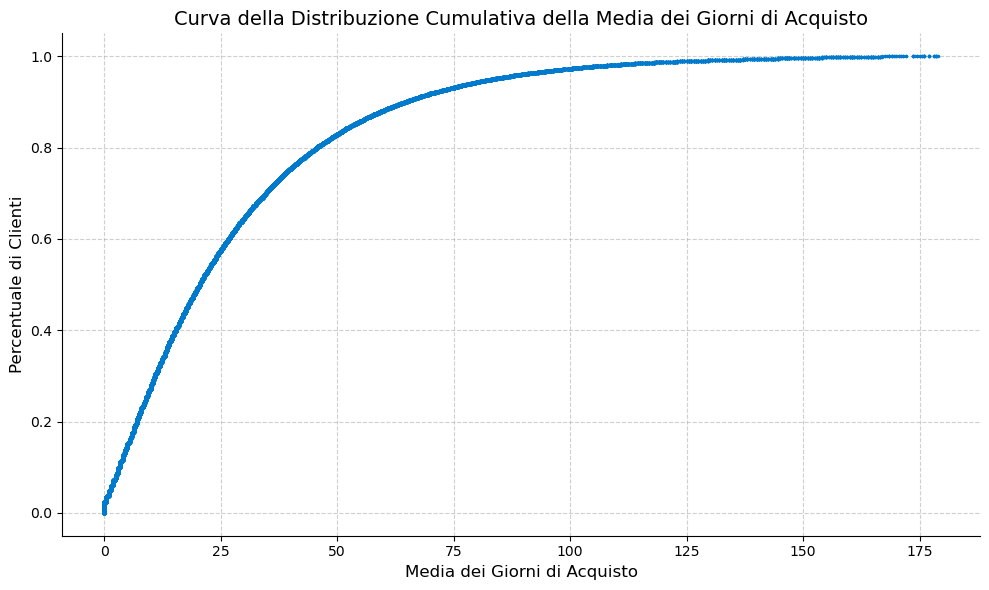

In [565]:
import matplotlib.pyplot as plt
import numpy as np

# Calcola la media dei giorni di acquisto per ciascun cliente
media_giorni_acquisto = media_giorni_per_ordine.groupby('customer_id')['differenza_giorni'].mean()

# Calcola la distribuzione cumulativa dei dati
sorted_data = np.sort(media_giorni_acquisto)
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Crea una curva della distribuzione cumulativa
plt.figure(figsize=(10, 6))
plt.plot(sorted_data, y, marker='.', linestyle='none', color='#007acc', markersize=3, linewidth=2)
plt.xlabel('Media dei Giorni di Acquisto', fontsize=12)
plt.ylabel('Percentuale di Clienti', fontsize=12)
plt.title('Curva della Distribuzione Cumulativa della Media dei Giorni di Acquisto', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()




In [566]:
import numpy as np

# Calcola la media dei giorni di acquisto per ciascun cliente
media_giorni_acquisto = media_giorni_per_ordine.groupby('customer_id')['differenza_giorni'].mean()

# Calcola la distribuzione cumulativa dei dati
sorted_data = np.sort(media_giorni_acquisto)
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Identifica il valore corrispondente al 90% sulla curva cumulativa
percentile_90 = 0.9
threshold_value = np.interp(percentile_90, y, sorted_data)

print(f"Soglia per il 90% dei clienti: {threshold_value} giorni")


Soglia per il 90% dei clienti: 64.66666666666667 giorni


# Churn

In [567]:
# Raggruppa per ordine e calcola la media delle differenze per ciascun ordine
media_giorni_per_ordine1 = media_giorni_per_ordine.groupby(['customer_id'])['differenza_giorni'].mean().reset_index()

media_giorni_per_ordine1.head()

,customer_id,differenza_giorni
0,23,19.285714
1,30,20.500000
2,32,5.000000
3,48,17.000000
4,50,16.000000


In [568]:
# Carica i dati
data = media_giorni_per_ordine1

# Definisci una soglia di tempo per il riacquisto
soglia_tempo = 65  # Ad esempio, consideriamo un riacquisto entro 30 giorni come "1"

# Crea la colonna target basata sulla soglia di tempo
data['churn'] = (data['differenza_giorni'] >= soglia_tempo).astype(int)

# Ora puoi utilizzare la colonna 'Riacquisto' come colonna target nel tuo modello
data.head()

,customer_id,differenza_giorni,churn
0,23,19.285714,0
1,30,20.500000,0
2,32,5.000000,0
3,48,17.000000,0
4,50,16.000000,0


In [569]:
churn = pd.merge(data, df_età, on = 'customer_id')
churn

,customer_id,differenza_giorni,churn,birthdate,Età,Range Età
0,23,19.285714,0,1978-08-14,45,43-54
1,30,20.500000,0,1978-12-12,44,43-54
2,32,5.000000,0,1988-10-31,34,31-42
3,48,17.000000,0,1954-09-23,69,67-78
4,50,16.000000,0,1979-09-02,44,43-54
...,...,...,...,...,...,...
70342,929438,0.500000,0,1978-07-03,45,43-54
70343,929899,1.000000,0,1984-02-08,39,31-42
70344,933057,0.000000,0,1963-12-13,59,55-66
70345,933559,0.000000,0,1977-07-20,46,43-54


In [570]:
churn = pd.merge(rfm_df, churn, on = 'customer_id')
churn.drop(columns=['birthdate','Range Età'], inplace = True)
churn

,customer_id,LastPurchaseDate,Recency,intervallo_recency,Frequency,intervallo_frequenza,Monetary,intervallo_monetary,RFM_Score,Customer_segment,differenza_giorni,churn,Età
0,23,2023-02-20 11:51:51,69,"(60.0, 90.0]",37,"(30, 40]",490.60,"(400, 500]",4.57,Top Customers,19.285714,0,45
1,30,2022-07-23 07:06:38,281,"(270.0, 300.0]",12,"(10, 20]",10179.56,"(10000, 15000]",3.38,Medium Value Customer,20.500000,0,44
2,32,2023-04-02 15:11:58,28,"(0.0, 30.0]",11,"(10, 20]",58.85,"(0, 100]",3.82,Medium Value Customer,5.000000,0,34
3,48,2023-04-30 19:35:36,0,NaN,52,"(50, 60]",1585.28,"(1000, 5000]",4.93,Top Customers,17.000000,0,69
4,50,2023-02-19 16:56:32,70,"(60.0, 90.0]",4,"(0, 10]",28.75,"(0, 100]",2.29,Low Value Customers,16.000000,0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70342,929438,2023-04-30 20:26:19,0,NaN,5,"(0, 10]",46.46,"(0, 100]",2.88,Low Value Customers,0.500000,0,45
70343,929899,2023-04-30 12:09:56,0,NaN,7,"(0, 10]",296.60,"(200, 300]",3.36,Medium Value Customer,1.000000,0,39
70344,933057,2023-04-30 09:10:30,0,NaN,2,"(0, 10]",15.94,"(0, 100]",1.70,Low Value Customers,0.000000,0,59
70345,933559,2023-04-30 08:28:37,0,NaN,2,"(0, 10]",27.96,"(0, 100]",1.70,Low Value Customers,0.000000,0,46


In [571]:
churn = pd.merge(churn, customer_reviews, on = 'customer_id')
churn.drop(columns=['intervallo_monetary', 'intervallo_frequenza'], inplace=True)
churn.head()

,customer_id,LastPurchaseDate,Recency,intervallo_recency,Frequency,Monetary,RFM_Score,Customer_segment,differenza_giorni,churn,Età,review_id,review_text
0,23,2023-02-20 11:51:51,69,"(60, 90]",37,490.60,4.57,Top Customers,19.285714,0,45,99166,This disappears faster than PB.<br />If you h...
1,32,2023-04-02 15:11:58,28,"(0, 30]",11,58.85,3.82,Medium Value Customer,5.000000,0,34,124696,I had a party in my mouth with this luscious l...
2,50,2023-02-19 16:56:32,70,"(60, 90]",4,28.75,2.29,Low Value Customers,16.000000,0,44,105836,Tastes like a Payday candy bar but with protei...
3,76,2023-03-08 19:23:27,53,"(30, 60]",3,14.60,1.95,Low Value Customers,147.500000,1,38,97056,First of all I want to say that my dog loves t...
4,109,2022-08-23 15:27:20,250,"(240, 270]",2,28.10,1.07,Lost Customers,10.000000,0,40,45862,You'll probably like this if you like ginger -...


In [572]:
churn['review_text'] = churn['review_text'].apply(lambda x: 0 if pd.isna(x) else 1 if isinstance(x, str) else x)
churn

,customer_id,LastPurchaseDate,Recency,intervallo_recency,Frequency,Monetary,RFM_Score,Customer_segment,differenza_giorni,churn,Età,review_id,review_text
0,23,2023-02-20 11:51:51,69,"(60.0, 90.0]",37,490.60,4.57,Top Customers,19.285714,0,45,99166,1
1,32,2023-04-02 15:11:58,28,"(0.0, 30.0]",11,58.85,3.82,Medium Value Customer,5.000000,0,34,124696,1
2,50,2023-02-19 16:56:32,70,"(60.0, 90.0]",4,28.75,2.29,Low Value Customers,16.000000,0,44,105836,1
3,76,2023-03-08 19:23:27,53,"(30.0, 60.0]",3,14.60,1.95,Low Value Customers,147.500000,1,38,97056,1
4,109,2022-08-23 15:27:20,250,"(240.0, 270.0]",2,28.10,1.07,Lost Customers,10.000000,0,40,45862,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52810,929438,2023-04-30 20:26:19,0,NaN,5,46.46,2.88,Low Value Customers,0.500000,0,45,81742,1
52811,929899,2023-04-30 12:09:56,0,NaN,7,296.60,3.36,Medium Value Customer,1.000000,0,39,96687,1
52812,933057,2023-04-30 09:10:30,0,NaN,2,15.94,1.70,Low Value Customers,0.000000,0,59,21850,1
52813,933559,2023-04-30 08:28:37,0,NaN,2,27.96,1.70,Low Value Customers,0.000000,0,46,54417,1


In [573]:
churn = pd.merge(churn, customer_account, on = 'customer_id')
churn.drop(columns=['intervallo_recency', 'favorite_store', 'account_id', 'loyatlty_status','activation_date', 'review_id', 'differenza_giorni','LastPurchaseDate', 'RFM_Score','Customer_segment'], inplace=True)
churn

,customer_id,Recency,Frequency,Monetary,churn,Età,review_text,loyalty_type
0,23,69,37,490.60,0,45,1,standard
1,32,28,11,58.85,0,34,1,business premium
2,50,70,4,28.75,0,44,1,premium
3,76,53,3,14.60,1,38,1,standard
4,109,250,2,28.10,0,40,1,standard
...,...,...,...,...,...,...,...,...
52928,929438,0,5,46.46,0,45,1,standard
52929,929899,0,7,296.60,0,39,1,standard
52930,933057,0,2,15.94,0,59,1,premium
52931,933559,0,2,27.96,0,46,1,standard


In [574]:
churn[churn['churn']== 1]

,customer_id,Recency,Frequency,Monetary,churn,Età,review_text,loyalty_type
3,76,53,3,14.60,1,38,1,standard
8,194,5,27,1163.24,1,44,1,business standard
10,204,43,7,66.52,1,50,1,premium
14,241,57,8,17.55,1,42,1,business standard
24,345,48,7,49.40,1,41,1,business standard
...,...,...,...,...,...,...,...,...
45842,722906,12,6,113.56,1,41,1,standard
46029,727038,10,12,76.44,1,41,1,standard
46059,727568,1,2,1.20,1,49,1,premium
46290,733015,10,3,26.87,1,47,1,standard


# Logistic Regression - Over & Under

In [575]:
# Carica i dati
data = churn

data = pd.get_dummies(data, columns=['loyalty_type'])

seed = 42
np.random.seed(seed)

# Dividi i dati in variabili indipendenti (X) e la variabile dipendente (y)
X = data.drop('churn', axis=1)  # Sostituisci 'Churn' con il nome della colonna target
y = data['churn']

# Sovracampionamento (oversampling) della classe di minoranza
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=seed)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Dividi il dataset resampled in un set di addestramento e un set di test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


# Crea il modello di regressione logistica
model = LogisticRegression()

# Addestra il modello sui dati di addestramento
model.fit(X_train, y_train)

# Esegui previsioni sul set di test
y_pred = model.predict(X_test)

# Valuta le prestazioni del modello
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)


print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{report}')


Accuracy: 0.6689054465316403
Confusion Matrix:
[[6807 2737]
 [3573 5941]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.71      0.68      9544
           1       0.68      0.62      0.65      9514

    accuracy                           0.67     19058
   macro avg       0.67      0.67      0.67     19058
weighted avg       0.67      0.67      0.67     19058



In [576]:
# Calcola l'F1-score
f1 = f1_score(y_test, y_pred)

print(f'F1-Score: {f1}')

F1-Score: 0.6531442392260334


## Curva ROC

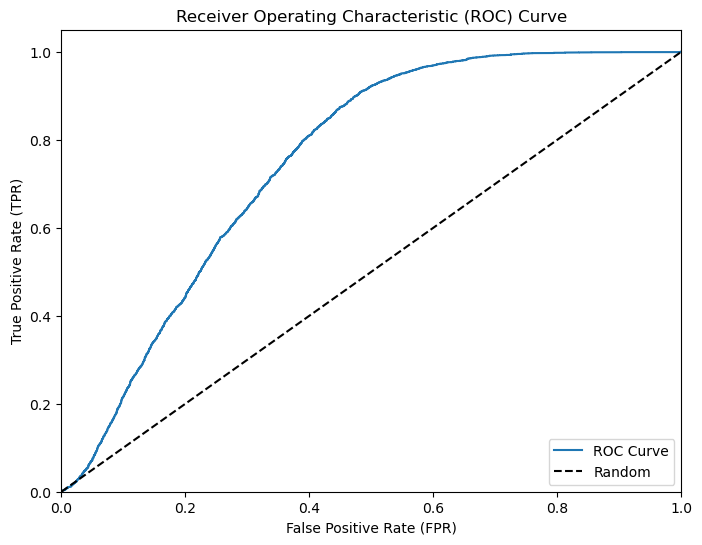

AUC: 0.7502992788145973


In [577]:
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilità della classe positiva

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calcola l'AUC
auc = roc_auc_score(y_test, y_prob)

print(f"AUC: {auc}")


## undersampling

In [578]:
# Carica i dati
data = churn

data = pd.get_dummies(data, columns=['loyalty_type'])

seed = 42
np.random.seed(seed)
# Dividi i dati in variabili indipendenti (X) e la variabile dipendente (y)
X = data.drop('churn', axis=1)  # Sostituisci 'Churn' con il nome della colonna target
y = data['churn']

# Sovracampionamento (oversampling) della classe di minoranza
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=seed)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Dividi il dataset resampled in un set di addestramento e un set di test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


# Crea il modello di regressione logistica
model = LogisticRegression()

# Addestra il modello sui dati di addestramento
model.fit(X_train, y_train)

# Esegui previsioni sul set di test
y_pred = model.predict(X_test)

# Valuta le prestazioni del modello
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{report}')


Accuracy: 0.7216446124763705
Confusion Matrix:
[[786 306]
 [283 741]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1092
           1       0.71      0.72      0.72      1024

    accuracy                           0.72      2116
   macro avg       0.72      0.72      0.72      2116
weighted avg       0.72      0.72      0.72      2116



c:\Users\miche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decision Tree - Over & Under

In [579]:
churn

,customer_id,Recency,Frequency,Monetary,churn,Età,review_text,loyalty_type
0,23,69,37,490.60,0,45,1,standard
1,32,28,11,58.85,0,34,1,business premium
2,50,70,4,28.75,0,44,1,premium
3,76,53,3,14.60,1,38,1,standard
4,109,250,2,28.10,0,40,1,standard
...,...,...,...,...,...,...,...,...
52928,929438,0,5,46.46,0,45,1,standard
52929,929899,0,7,296.60,0,39,1,standard
52930,933057,0,2,15.94,0,59,1,premium
52931,933559,0,2,27.96,0,46,1,standard


In [580]:
# Carica i dati
data = churn  # Assicurati di avere un file CSV con i dati appropriati
data = pd.get_dummies(data, columns=['loyalty_type'])
seed = 42
np.random.seed(seed)
# Dividi i dati in variabili indipendenti (X) e la variabile dipendente (y)
X = data.drop('churn', axis=1)  # Sostituisci 'Churn' con il nome della colonna target
y = data['churn']

# Sovracampionamento (oversampling) della classe di minoranza
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=seed)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Dividi il dataset resampled in un set di addestramento e un set di test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Crea il modello Decision Tree
model = DecisionTreeClassifier()

# Addestra il modello sui dati di addestramento
model.fit(X_train, y_train)

# Esegui previsioni sul set di test
y_pred = model.predict(X_test)

# Valuta le prestazioni del modello
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{report}')


Accuracy: 0.9612236331199496
Confusion Matrix:
[[8808  736]
 [   3 9511]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      9544
           1       0.93      1.00      0.96      9514

    accuracy                           0.96     19058
   macro avg       0.96      0.96      0.96     19058
weighted avg       0.96      0.96      0.96     19058



## Curva ROC

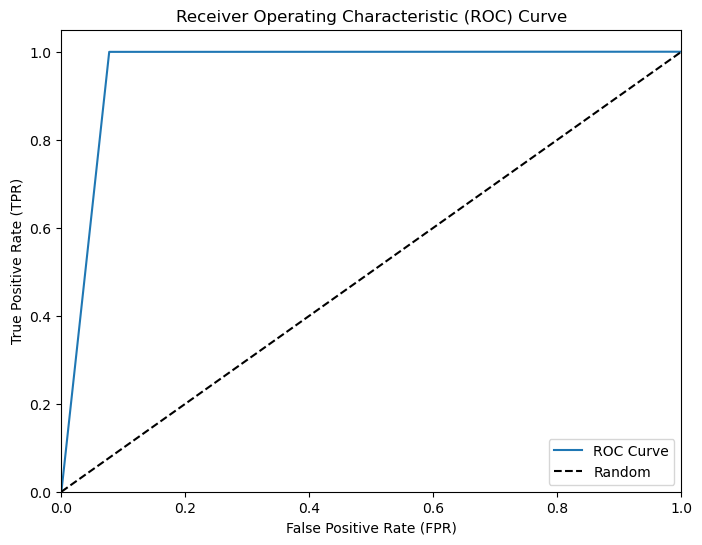

AUC: 0.9612840811115079


In [581]:
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilità della classe positiva

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calcola l'AUC
auc = roc_auc_score(y_test, y_prob)

print(f"AUC: {auc}")


## Undersampling

In [582]:
# Carica i dati
data = churn  # Assicurati di avere un file CSV con i dati appropriati
data = pd.get_dummies(data, columns=['loyalty_type'])
seed = 42
np.random.seed(seed)
# Dividi i dati in variabili indipendenti (X) e la variabile dipendente (y)
X = data.drop('churn', axis=1)  # Sostituisci 'Churn' con il nome della colonna target
y = data['churn']

# Sottocampionamento (undersampling) della classe di maggioranza
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=seed)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Dividi il dataset resampled in un set di addestramento e un set di test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Crea il modello Decision Tree
model = DecisionTreeClassifier()

# Addestra il modello sui dati di addestramento
model.fit(X_train, y_train)

# Esegui previsioni sul set di test
y_pred = model.predict(X_test)

# Valuta le prestazioni del modello
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{report}')


Accuracy: 0.7693761814744802
Confusion Matrix:
[[832 260]
 [228 796]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1092
           1       0.75      0.78      0.77      1024

    accuracy                           0.77      2116
   macro avg       0.77      0.77      0.77      2116
weighted avg       0.77      0.77      0.77      2116



# Random Forest - Over & Under

In [583]:
# Carica i dati
data = churn
data = pd.get_dummies(data, columns=['loyalty_type'])

seed = 42
np.random.seed(seed)
# Dividi i dati in variabili indipendenti (X) e la variabile dipendente (y)
X = data.drop('churn', axis=1)  # Sostituisci 'Churn' con il nome della colonna target
y = data['churn']

# Sovracampionamento (oversampling) della classe di minoranza
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=seed)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Dividi il dataset resampled in un set di addestramento e un set di test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Crea il modello Random Forest
model = RandomForestClassifier()

# Addestra il modello sui dati di addestramento
model.fit(X_train, y_train)

# Esegui previsioni sul set di test
y_pred = model.predict(X_test)

# Valuta le prestazioni del modello
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)


print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{report}')


Accuracy: 0.9709833140938189
Confusion Matrix:
[[8998  546]
 [   7 9507]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      9544
           1       0.95      1.00      0.97      9514

    accuracy                           0.97     19058
   macro avg       0.97      0.97      0.97     19058
weighted avg       0.97      0.97      0.97     19058



## Curva ROC

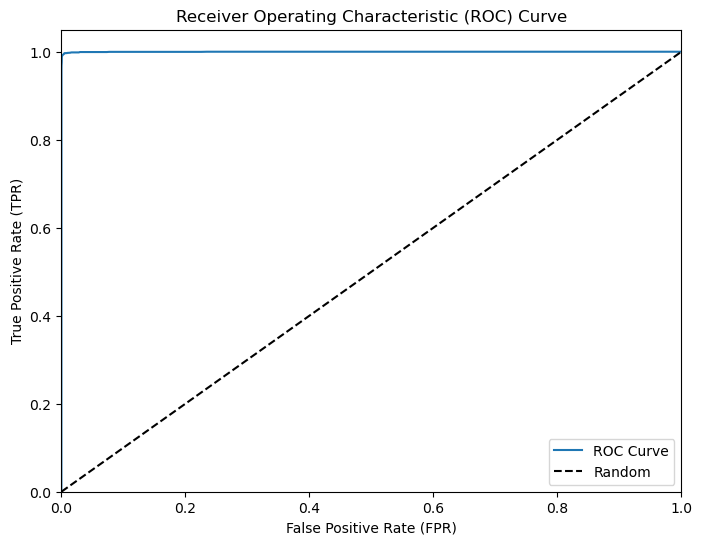

AUC: 0.9997613313401823


In [584]:
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilità della classe positiva

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calcola l'AUC
auc = roc_auc_score(y_test, y_prob)

print(f"AUC: {auc}")

## Undersampling

In [585]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler

# Carica i dati
data = churn
data = pd.get_dummies(data, columns=['loyalty_type'])
seed = 42
np.random.seed(seed)
# Dividi i dati in variabili indipendenti (X) e la variabile dipendente (y)
X = data.drop('churn', axis=1)  # Sostituisci 'Churn' con il nome della colonna target
y = data['churn']

# Sottocampionamento (undersampling) della classe di maggioranza
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=seed)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Dividi il dataset resampled in un set di addestramento e un set di test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Crea il modello Random Forest
model = RandomForestClassifier()

# Addestra il modello sui dati di addestramento
model.fit(X_train, y_train)

# Esegui previsioni sul set di test
y_pred = model.predict(X_test)

# Valuta le prestazioni del modello
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{report}')


Accuracy: 0.8355387523629489
Confusion Matrix:
[[857 235]
 [113 911]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1092
           1       0.79      0.89      0.84      1024

    accuracy                           0.84      2116
   macro avg       0.84      0.84      0.84      2116
weighted avg       0.84      0.84      0.84      2116

